In [1]:
import pandas as pd

df = pd.read_csv('Emotion_final.csv')

In [2]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
df.tail()

,Text,Emotion
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear
21458,"I am dismayed , but not surpris",fear


In [4]:
category = pd.get_dummies(df.Emotion)

df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Emotion')
df_baru

,Text,anger,fear,happy,love,sadness,surprise
0,i didnt feel humiliated,False,False,False,False,True,False
1,i can go from feeling so hopeless to so damned...,False,False,False,False,True,False
2,im grabbing a minute to post i feel greedy wrong,True,False,False,False,False,False
3,i am ever feeling nostalgic about the fireplac...,False,False,False,True,False,False
4,i am feeling grouchy,True,False,False,False,False,False
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,False,True,False,False,False,False
21455,Successive state elections have seen the gover...,False,True,False,False,False,False
21456,Vincent was irritated but not dismay,False,True,False,False,False,False
21457,Kendall-Hume turned back to face the dismayed ...,False,True,False,False,False,False


In [5]:
text = df_baru['Text'].values
label = df_baru[['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']].values

text

array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong', ...,
       'Vincent was irritated but not dismay',
       'Kendall-Hume turned back to face the dismayed coup',
       'I am dismayed , but not surpris'], dtype=object)

In [6]:
from sklearn.model_selection import train_test_split
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2)

In [7]:
print(len(text))
print(len(text_train))
print(len(text_test))

21459
17167
4292


In [8]:
from prompt_toolkit import output
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

filt = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ '

tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>', filters=filt)
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

In [9]:
word_index = tokenizer.word_index
print(len(word_index))

19259


In [10]:
import json
with open('word_index.json', 'w') as fp:
    json.dump(word_index, fp)

In [11]:
sekuens_train = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)

padded_train = pad_sequences(sekuens_train,
                             maxlen=20,
                             padding='post',
                             truncating='post')
padded_test = pad_sequences(sekuens_test,
                            maxlen=20,
                            padding='post',
                            truncating='post')

In [12]:
print(sekuens_train)
print(sekuens_test)

[[2, 3, 2831, 650, 4, 602, 27, 24, 83, 401, 1, 4, 2213, 5, 114, 56, 12, 24, 95], [2, 3, 47, 2214], [2, 40, 217, 243, 1571, 58, 980, 878, 231, 5, 61, 5, 6, 259, 8, 10, 14, 59, 40, 3848, 100, 125, 4, 28, 284, 44, 1013, 2, 63, 21, 391, 1634, 9, 1328], [2, 191, 10, 47, 696, 2832, 27, 793, 1434], [2, 254, 45, 69, 5, 209, 74, 38, 1, 103, 117, 804, 915, 4419, 5, 36, 11, 742, 9, 320, 20, 10, 371, 634], [2, 25, 10, 173, 8, 575, 310, 1, 17, 9], [2, 273, 2, 3, 563, 4, 268], [18, 76, 10, 471, 77, 134, 80, 51, 70, 107, 154], [2, 3, 341, 17, 143, 9, 40, 45, 491, 1, 378, 794, 2, 40], [2, 122, 73, 302, 6, 816, 1, 6, 2, 89, 31, 89, 73, 10, 113, 3, 47, 248, 113, 3, 5, 21, 74, 23, 20, 2, 224, 7, 175, 1, 93, 424, 148, 79, 22, 7, 42], [2, 3, 14, 350, 55, 1927, 2335, 22], [2, 14, 5, 78, 731, 1188, 545, 58, 6, 329, 4, 9, 18, 277, 17, 75, 2, 25, 30, 6, 329, 19, 2, 635, 3, 153, 576, 4, 277, 34, 2, 158, 14, 24], [2, 1053, 74, 402, 44, 2, 530, 142, 19, 3, 897], [2, 173, 8, 3, 7, 60, 675, 27, 24], [2, 3, 15, 148,

In [54]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    # tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(padded_train.shape[1],1)),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax'),
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 16)          80000     
                                                                 
 lstm_30 (LSTM)              (None, None, 64)          20736     
                                                                 
 lstm_31 (LSTM)              (None, 64)                33024     
                                                                 
 dense_56 (Dense)            (None, 128)               8320      
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dense_58 (Dense)            (None, 6)                 390       
                                                                 
Total params: 150726 (588.77 KB)
Trainable params: 15

In [59]:
from keras.src import callbacks
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        acc = 0.99
        if(logs.get('accuracy') > acc):
            print(f'n\Akurasi training telah mencapai >{acc}')
            self.model.stop_training = True
callbacks = myCallback()    

In [62]:
hist = model.fit(padded_train,
                 label_train,
                 epochs=50,
                 validation_data=(padded_test, label_test),
                 verbose=2,)

Epoch 1/50
537/537 - 8s - loss: 0.0250 - accuracy: 0.9903 - val_loss: 1.4727 - val_accuracy: 0.8194 - 8s/epoch - 15ms/step
Epoch 2/50
537/537 - 8s - loss: 0.0335 - accuracy: 0.9878 - val_loss: 1.1944 - val_accuracy: 0.8236 - 8s/epoch - 15ms/step
Epoch 3/50
537/537 - 8s - loss: 0.0185 - accuracy: 0.9921 - val_loss: 1.3845 - val_accuracy: 0.8169 - 8s/epoch - 15ms/step
Epoch 4/50
537/537 - 8s - loss: 0.0188 - accuracy: 0.9923 - val_loss: 1.6613 - val_accuracy: 0.8220 - 8s/epoch - 15ms/step
Epoch 5/50
537/537 - 8s - loss: 0.0230 - accuracy: 0.9905 - val_loss: 1.6693 - val_accuracy: 0.8187 - 8s/epoch - 15ms/step
Epoch 6/50
537/537 - 8s - loss: 0.0301 - accuracy: 0.9885 - val_loss: 1.2243 - val_accuracy: 0.8206 - 8s/epoch - 15ms/step
Epoch 7/50
537/537 - 8s - loss: 0.0225 - accuracy: 0.9921 - val_loss: 1.3893 - val_accuracy: 0.8241 - 8s/epoch - 15ms/step
Epoch 8/50
537/537 - 8s - loss: 0.0197 - accuracy: 0.9923 - val_loss: 1.3292 - val_accuracy: 0.8199 - 8s/epoch - 15ms/step
Epoch 9/50
537/5

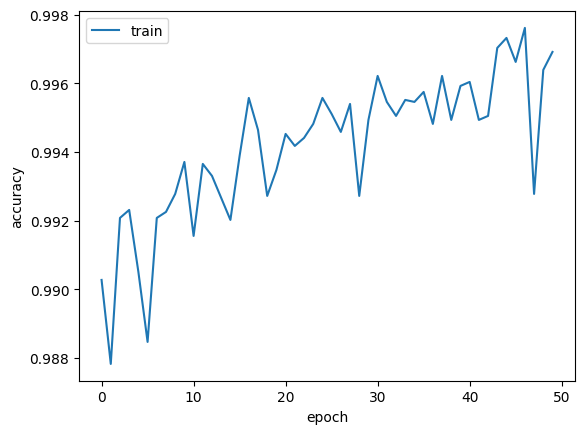

In [64]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [65]:
model.save("model.h5")

In [66]:
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model